In [159]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [160]:
df = pd.read_csv('../datasets/loan_data.csv')

In [161]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [163]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [164]:
df.duplicated().sum()

0

In [165]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [166]:
df.person_gender.value_counts()

person_gender
male      24841
female    20159
Name: count, dtype: int64

In [167]:
df = df[df.person_age <= 100]


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_gender                   44993 non-null  object 
 2   person_education                44993 non-null  object 
 3   person_income                   44993 non-null  float64
 4   person_emp_exp                  44993 non-null  int64  
 5   person_home_ownership           44993 non-null  object 
 6   loan_amnt                       44993 non-null  float64
 7   loan_intent                     44993 non-null  object 
 8   loan_int_rate                   44993 non-null  float64
 9   loan_percent_income             44993 non-null  float64
 10  cb_person_cred_hist_length      44993 non-null  float64
 11  credit_score                    44993 non-null  int64  
 12  previous_loan_defaults_on_file  44993

In [169]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [170]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,0.222257
std,5.909737,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,0.415767
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


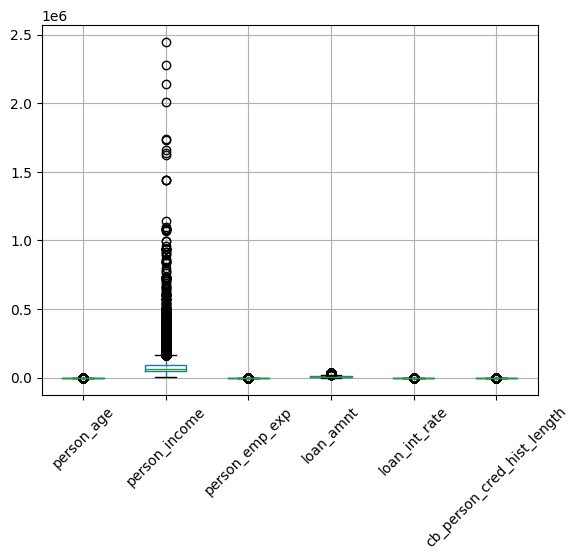

Total of 6511 outliers detected. Data has been scaled.


In [171]:
X = df[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','cb_person_cred_hist_length']]
X.boxplot()
plt.xticks(rotation=45)
plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    #print(X_scaled[:5])
else:
    print("No outliers detected.")


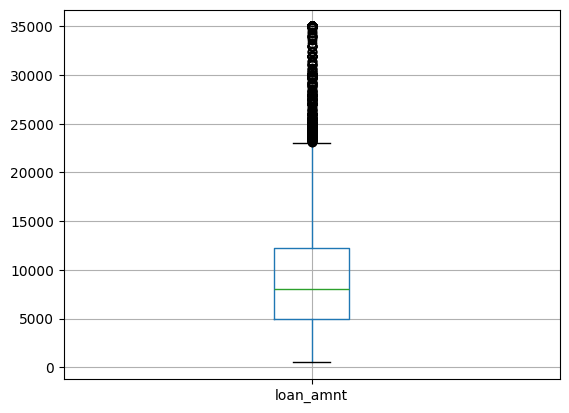

In [172]:
X = df[['loan_amnt']]
X.boxplot()

plt.show()

In [173]:
person_gender = pd.get_dummies(df.person_gender)
df = pd.concat([df, person_gender], axis=1)
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,True,False
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,True,False
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,True,False
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,True,False
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,False,True


In [174]:
df.drop('person_gender', axis=1 ,inplace = True)

In [175]:
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,True,False
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,True,False
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,True,False
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,True,False
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,False,True


In [176]:
encoded_df = pd.get_dummies(df['person_home_ownership'], prefix='person_home_ownership')
df = pd.concat([df, encoded_df], axis=1)

In [177]:
df.head()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,female,male,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22.0,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,True,False,False,False,False,True
1,21.0,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,True,False,False,False,True,False
2,25.0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,True,False,True,False,False,False
3,23.0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,True,False,False,False,False,True
4,24.0,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,False,True,False,False,False,True


In [178]:
education = pd.get_dummies(df['person_education'], prefix='education')
df = pd.concat([df, education], axis=1)

In [179]:
df = df.drop('person_education', axis=1)

In [180]:
df.head()

,person_age,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,male,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,education_Associate,education_Bachelor,education_Doctorate,education_High School,education_Master
0,22.0,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,...,False,False,False,False,True,False,False,False,False,True
1,21.0,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,...,False,False,False,True,False,False,False,False,True,False
2,25.0,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,...,False,True,False,False,False,False,False,False,True,False
3,23.0,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,...,False,False,False,False,True,False,True,False,False,False
4,24.0,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,...,True,False,False,False,True,False,False,False,False,True


In [181]:
home_ownership = pd.get_dummies(df['person_home_ownership'], prefix='ownership')
df = pd.concat([df, home_ownership], axis=1)
df.drop('person_home_ownership', inplace=True,axis=1)

In [182]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            9151
MEDICAL              8548
VENTURE              7815
PERSONAL             7551
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [183]:
loan_intent = pd.get_dummies(df['loan_intent'], prefix='intent')
df = pd.concat([df, loan_intent], axis=1)

In [184]:
df.drop('loan_intent', axis=1, inplace=True)

In [186]:
df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status',
       'female', 'male', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'education_Associate',
       'education_Bachelor', 'education_Doctorate', 'education_High School',
       'education_Master', 'ownership_MORTGAGE', 'ownership_OTHER',
       'ownership_OWN', 'ownership_RENT', 'intent_DEBTCONSOLIDATION',
       'intent_EDUCATION', 'intent_HOMEIMPROVEMENT', 'intent_MEDICAL',
       'intent_PERSONAL', 'intent_VENTURE'],
      dtype='object')

In [187]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44993.000000,4.499300e+04,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000,44993.000000
mean,27.748428,7.990845e+04,5.394528,9583.176761,11.006448,0.139736,5.866557,632.585713,0.222257
std,5.909737,6.332213e+04,5.927159,6314.802655,2.978985,0.087207,3.877167,50.402411,0.415767
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719500e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577800e+04,8.000000,12237.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,94.000000,2.448661e+06,76.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_income                   44993 non-null  float64
 2   person_emp_exp                  44993 non-null  int64  
 3   loan_amnt                       44993 non-null  float64
 4   loan_int_rate                   44993 non-null  float64
 5   loan_percent_income             44993 non-null  float64
 6   cb_person_cred_hist_length      44993 non-null  float64
 7   credit_score                    44993 non-null  int64  
 8   previous_loan_defaults_on_file  44993 non-null  object 
 9   loan_status                     44993 non-null  int64  
 10  female                          44993 non-null  bool   
 11  male                            44993 non-null  bool   
 12  person_home_ownership_MORTGAGE  44993

In [189]:
data_dist = df.select_dtypes([float])
data_dist

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22.0,71948.0,35000.0,16.02,0.49,3.0
1,21.0,12282.0,1000.0,11.14,0.08,2.0
2,25.0,12438.0,5500.0,12.87,0.44,3.0
3,23.0,79753.0,35000.0,15.23,0.44,2.0
4,24.0,66135.0,35000.0,14.27,0.53,4.0
...,...,...,...,...,...,...
44995,27.0,47971.0,15000.0,15.66,0.31,3.0
44996,37.0,65800.0,9000.0,14.07,0.14,11.0
44997,33.0,56942.0,2771.0,10.02,0.05,10.0
44998,29.0,33164.0,12000.0,13.23,0.36,6.0


In [192]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT,intent_DEBTCONSOLIDATION,intent_EDUCATION,intent_HOMEIMPROVEMENT,intent_MEDICAL,intent_PERSONAL,intent_VENTURE
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,No,1,...,False,False,False,True,False,False,False,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,0,...,False,False,True,False,False,True,False,False,False,False
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,No,1,...,True,False,False,False,False,False,False,True,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,No,1,...,False,False,False,True,False,False,False,True,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,No,1,...,False,False,False,True,False,False,False,True,False,False


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44993 entries, 0 to 44999
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44993 non-null  float64
 1   person_income                   44993 non-null  float64
 2   person_emp_exp                  44993 non-null  int64  
 3   loan_amnt                       44993 non-null  float64
 4   loan_int_rate                   44993 non-null  float64
 5   loan_percent_income             44993 non-null  float64
 6   cb_person_cred_hist_length      44993 non-null  float64
 7   credit_score                    44993 non-null  int64  
 8   previous_loan_defaults_on_file  44993 non-null  object 
 9   loan_status                     44993 non-null  int64  
 10  female                          44993 non-null  bool   
 11  male                            44993 non-null  bool   
 12  person_home_ownership_MORTGAGE  44993

In [ ]:
X = df['loan_status']
y = df.drop('loan_status', axis=1)

KeyError: 'loan_status'

In [203]:
y
